In [2]:
from pathlib import Path
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

Path('database.db').touch()
conn = sqlite3.connect('database.db')
c = conn.cursor()
c.execute('''create table evanston311 (id int primary key,
                                       priority varchar(6),
                                       source varchar(20),
                                       category varchar(64),
                                       date_created timestamp with time zone,
                                       date_completed timestamp with time zone,
                                       street varchar(48),
                                       house_num varchar(12),
                                       zip char(5),
                                       description text);''')
c.execute('''create table stackoverflow (id serial,
                                         tag varchar(30) references tag_company(tag),
                                         date date,
                                         question_count integer default 0,  
                                         question_pct double precision, 
                                         unanswered_count integer,
                                         unanswered_pct double precision);''')
c.execute('''create table fortune500 (rank int not null,
                                      title varchar primary key,
                                      name varchar not null unique,
                                      ticker char(5),
                                      url varchar,
                                      hq varchar,
                                      sector varchar,
                                      industry varchar,
                                      employees int check (employees > 0),
                                      revenues int,
                                      revenues_change real,
                                      profits numeric,
                                      profits_change real,
                                      assets numeric check (assets > 0),
                                      equity numeric);''')
c.execute('''create table company (
  id int primary key,
  exchange varchar(10),
  ticker char(5) unique,
  name varchar not null,
  parent_id int references company(id)
);
''')
c.execute('''create table tag_company (
  tag varchar(30) primary key,
  company_id int references company(id)
);
''')
c.execute('''create table tag_type (
  id serial,
  tag varchar(30) references tag_company(tag),
  type varchar(30)
);''')

c.execute('''insert into company values 
(1, 'nasdaq', 'PYPL', 'PayPal Holdings Incorporated', NULL),
(2, 'nasdaq', 'AMZN', 'Amazon.com Inc', NULL),
(3, 'nasdaq', 'MSFT', 'Microsoft Corp.', NULL),
(4, 'nasdaq', 'MDB', 'MongoDB', NULL),
(5, 'nasdaq', 'DBX', 'Dropbox', NULL),
(6, 'nasdaq', 'AAPL', 'Apple Incorporated', NULL),
(7, 'nasdaq', 'CTXS', 'Citrix Systems', NULL),
(8, 'nasdaq', 'GOOGL', 'Alphabet', NULL),
(9, 'nyse', 'IBM', 'International Business Machines Corporation', NULL),
(10, 'nasdaq', 'ADBE', 'Adobe Systems Incorporated', NULL),
(11, NULL, NULL, 'Stripe', NULL),
(12, NULL, NULL, 'Amazon Web Services', 2),
(13, NULL, NULL, 'Google LLC', 8),
(14, 'nasdaq', 'EBAY', 'eBay, Inc.', NULL); ''')

c.execute('''insert into tag_company (tag, company_id) values 
('actionscript', 10),
('actionscript-3', 10),
('amazon', 2),
('amazon-api', 2),
('amazon-appstore', 2),
('amazon-cloudformation', 12),
('amazon-cloudfront', 12),
('amazon-cloudsearch', 12),
('amazon-cloudwatch', 12),
('amazon-cognito', 12),
('amazon-data-pipeline', 12),
('amazon-dynamodb', 12),
('amazon-ebs', 12),
('amazon-ec2', 12),
('amazon-ecs', 12),
('amazon-elastic-beanstalk', 12),
('amazon-elasticache', 12),
('amazon-elb', 12),
('amazon-emr', 12),
('amazon-fire-tv', 2),
('amazon-glacier', 12),
('amazon-kinesis', 12),
('amazon-lambda', 12),
('amazon-mws', 12),
('amazon-rds', 12),
('amazon-rds-aurora', 12),
('amazon-redshift', 12),
('amazon-route53', 12),
('amazon-s3', 12),
('amazon-ses', 12),
('amazon-simpledb', 12),
('amazon-sns', 12),
('amazon-sqs', 12),
('amazon-swf', 12),
('amazon-vpc', 12),
('amazon-web-services', 12),
('android', 13),
('android-pay', 13),
('applepay', 6),
('applepayjs', 6),
('azure', 3),
('citrix', 7),
('cognos', 9),
('dropbox', 5),
('dropbox-api', 5),
('excel', 3),
('google-spreadsheet', 13),
('ios', 6),
('ios8', 6),
('ios9', 6),
('mongodb', 4),
('osx', 6),
('paypal', 1),
('sql-server', 3),
('stripe-payments', 11),
('windows', 3);''')

c.execute('''insert into tag_type (tag, type) values 
('amazon-cloudformation', 'cloud'),
('amazon-cloudfront', 'cloud'),
('amazon-cloudsearch', 'cloud'),
('amazon-cloudwatch', 'cloud'),
('amazon-cognito', 'cloud'),
('amazon-cognito', 'identity'),
('amazon-data-pipeline', 'cloud'),
('amazon-dynamodb', 'cloud'),
('amazon-dynamodb', 'database'),
('amazon-ebs', 'cloud'),
('amazon-ec2', 'cloud'),
('amazon-ecs', 'cloud'),
('amazon-elastic-beanstalk', 'cloud'),
('amazon-elasticache', 'cloud'),
('amazon-elb', 'cloud'),
('amazon-emr', 'cloud'),
('amazon-glacier', 'cloud'),
('amazon-glacier', 'storage'),
('amazon-kinesis', 'cloud'),
('amazon-lambda', 'cloud'),
('amazon-mws', 'api'),
('amazon-rds-aurora', 'cloud'),
('amazon-rds', 'cloud'),
('amazon-rds-aurora', 'database'),
('amazon-rds', 'database'),
('amazon-redshift', 'cloud'),
('amazon-route53', 'cloud'),
('amazon-s3', 'cloud'),
('amazon-ses', 'cloud'),
('amazon-simpledb', 'cloud'),
('amazon-simpledb', 'database'),
('amazon-sns', 'cloud'),
('amazon-sqs', 'cloud'),
('amazon-swf', 'cloud'),
('amazon-vpc', 'cloud'),
('amazon-web-services', 'cloud'),
('amazon', 'company'),
('android-pay', 'payment'),
('android', 'mobile-os'),
('applepay', 'payment'),
('applepayjs', 'payment'),
('azure', 'cloud'),
('citrix', 'company'),
('dropbox-api', 'api'),
('dropbox-api', 'api'),
('dropbox-api', 'api'),
('dropbox', 'storage'),
('dropbox', 'cloud'),
('dropbox', 'company'),
('excel', 'spreadsheet'),
('google-spreadsheet', 'spreadsheet'),
('ios', 'mobile-os'),
('ios8', 'mobile-os'),
('ios9', 'mobile-os'),
('mongodb', 'database'),
('osx', 'os'),
('paypal', 'payment'),
('paypal', 'company'),
('sql-server', 'database'),
('stripe-payments', 'payment'),
('windows', 'os');''')

conn.commit()

files = ["ev311.csv", "stackexchange.csv", "fortune.csv" ]
tables = ["evanston311", "stackoverflow", "fortune500" ]
for file, name in zip(files, tables):
    df = pd.read_csv(file)
    df.to_sql(name, conn, if_exists='append', index = False)

engine = create_engine("sqlite:///database.db")
engine.table_names()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:206: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['company',
 'evanston311',
 'fortune500',
 'stackoverflow',
 'tag_company',
 'tag_type']

### Select few rows to browse the data

In [2]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///database.db")

In [3]:
import pandas as pd
pd.read_sql_query("SELECT * FROM company LIMIT 5", engine)

,id,exchange,ticker,name,parent_id
0,1,nasdaq,PYPL,PayPal Holdings Incorporated,None
1,2,nasdaq,AMZN,Amazon.com Inc,None
2,3,nasdaq,MSFT,Microsoft Corp.,None
3,4,nasdaq,MDB,MongoDB,None
4,5,nasdaq,DBX,Dropbox,None


### Explore table sizes

Let's start by exploring five related tables:

`stackoverflow`: questions asked on Stack Overflow with certain tags

`company`: information on companies related to tags in stackoverflow

`tag_company`: links stackoverflow to company

`tag_type`: type categories applied to tags in stackoverflow

`fortune500`: information on top US companies

Count the number of rows in a table with

```
SELECT count(*) 
FROM tablename;
```

Count the number of columns in a table by selecting a few rows and manually counting the columns in the result.

**Which table has the most rows? Which table has the most columns?**

In [12]:
display(pd.read_sql("SELECT COUNT(*) FROM stackoverflow", engine))
print("Number of columns = ", len(list(pd.read_sql("SELECT * FROM stackoverflow LIMIT 1", engine))))

display(pd.read_sql("SELECT COUNT(*) FROM fortune500", engine))
print("Number of columns = ", len(list(pd.read_sql("SELECT * FROM fortune500 LIMIT 1", engine))))

display(pd.read_sql("SELECT COUNT(*) FROM tag_type", engine))
print("Number of columns = ", len(list(pd.read_sql("SELECT * FROM tag_type LIMIT 1", engine))))

display(pd.read_sql("SELECT COUNT(*) FROM tag_company", engine))
print("Number of columns = ", len(list(pd.read_sql("SELECT * FROM tag_company LIMIT 1", engine))))

display(pd.read_sql("SELECT COUNT(*) FROM company", engine))
print("Number of columns = ", len(list(pd.read_sql("SELECT * FROM company LIMIT 1", engine))))

,COUNT(*)
0,45238


Number of columns =  7


,COUNT(*)
0,500


Number of columns =  15


,COUNT(*)
0,61


Number of columns =  3


,COUNT(*)
0,56


Number of columns =  2


,COUNT(*)
0,14


Number of columns =  5


`stackoverflow` has the most rows = 45,238; `fortune500` has the most columns = 15


### Count missing values
Which column of `fortune500` has the most missing values? To find out, you'll need to check each column individually, although here we'll check just three.

* Subtract the count of the non-`NULL` `ticker` values from the total number of rows; alias the difference as `missing`.

In [16]:
pd.read_sql_query('''
SELECT COUNT(*) - COUNT( ticker) AS missing
FROM fortune500;''', engine)

,missing
0,32


* Repeat for the `profits_change` column.

In [15]:
pd.read_sql('''
SELECT COUNT(*) - COUNT(profits_change) AS missing
FROM fortune500;''', engine)

,missing
0,63


* Repeat for the `industry` column.

In [18]:
pd.read_sql('''
SELECT COUNT(*)-COUNT(industry) AS missing FROM fortune500''', engine)

,missing
0,13


### Join tables
Part of exploring a database is figuring out how tables relate to each other. The `company` and `fortune500` tables don't have a formal relationship between them in the database, but this doesn't prevent you from joining them.

To join the tables, you need to find a column that they have in common where the values are consistent across the tables. Remember: <ins>just because two tables have a column with the same name, it doesn't mean those columns necessarily contain compatible data</ins>. If you find more than one pair of columns with similar data, you may need to try joining with each in turn to see if you get the same number of results.

* Look at the contents of the `company` and `fortune500` tables. Find a column that they have in common where the values for each company are the same in both tables.
* Join the `company` and `fortune500` tables with an `INNER JOIN`.
* Select only `company.name` for companies that appear in both tables.

In [19]:
pd.read_sql_query('''
SELECT c.name
FROM company c
INNER JOIN fortune500
USING(ticker);''', engine).head()

,name
0,Apple Incorporated
1,Amazon.com Inc
2,Alphabet
3,Microsoft Corp.
4,International Business Machines Corporation


# Foreign keys

Recall that foreign keys reference another row in the database via a unique ID. Values in a foreign key column are restricted to values in the referenced column OR `NULL`.

Using what you know about foreign keys, why can't the `tag` column in the `tag_type` table be a foreign key that references the `tag` column in the `stackoverflow` table?

Remember, you can reference the slides using the icon in the upper right of the screen to review the requirements for a foreign key.

##### stackoverflow.tag contains duplicate values

###  Read an entity relationship diagram
The information you need is sometimes split across multiple tables in the database.

What is the most common `stackoverflow` `tag_type`? What companies have a `tag` of that `type`?

To generate a list of such companies, you'll need to join three tables together.

* First, using the `tag_type` table, count the number of tags with each `type`.
* Order the results to find the most common tag `type`.

In [20]:
pd.read_sql('''
-- Count the number of tags with each type
SELECT type, COUNT(*) AS count
  FROM tag_type
 -- To get the count for each type, what do you need to do?
 GROUP BY type
 -- Order the results with the most common
 -- tag types listed first
 ORDER BY count DESC;''', engine)

,type,count
0,cloud,31
1,database,6
2,payment,5
3,mobile-os,4
4,company,4
5,api,4
6,storage,2
7,spreadsheet,2
8,os,2
9,identity,1


จากผลลัพธ์ เราจะเห็นว่า most common type คือ cloud

* Join the `tag_company`, `company`, and `tag_type` tables, keeping only mutually occurring records.
* Select `company.name`, `tag_type.tag`, and `tag_type.type` for tags with the most common type from the previous step.

In [21]:
pd.read_sql('''
SELECT company.name, tag_type.tag, tag_type.type
FROM company
  	   -- Join to the tag_company table
INNER JOIN tag_company ON company.id = tag_company.company_id
       -- Join to the tag_type table
INNER JOIN tag_type USING(tag)
WHERE type='cloud';''', engine).head()

,name,tag,type
0,Amazon Web Services,amazon-cloudformation,cloud
1,Amazon Web Services,amazon-cloudfront,cloud
2,Amazon Web Services,amazon-cloudsearch,cloud
3,Amazon Web Services,amazon-cloudwatch,cloud
4,Amazon Web Services,amazon-cognito,cloud


# Coalesce
The `coalesce()` function can be useful for specifying a default or backup value when a column contains `NULL` values.

`coalesce()` checks arguments in order and returns the first non-`NULL` value, if one exists.

```
coalesce(NULL, 1, 2) = 1
coalesce(NULL, NULL) = NULL
coalesce(2, 3, NULL) = 2
```

In the `fortune500 data`, industry contains some missing values. Use `coalesce()` to use the value of `sector` as the industry when `industry` is `NULL`. Then find the most common industry.

* Use `coalesce()` to select the first non-`NULL` value from `industry`, `sector`, or `'Unknown'` as a fallback value.
* Alias the result of the call to `coalesce()` as `industry2`.
* Count the number of rows with each `industry2` value.
* Find the most common value of `industry2`.

In [23]:
pd.read_sql_query('''
SELECT COALESCE(industry, sector, 'Unknown') AS industry2,
       -- Don't forget to count!
       COUNT(*) AS count
  FROM fortune500 
-- Group by what? (What are you counting by?)
 GROUP BY industry2
-- Order results to see most common first
 ORDER BY count DESC
-- Limit results to get just the one value you want
 LIMIT 1;''', engine)

,industry2,count
0,Utilities: Gas and Electric,22


# Coalesce with a self-join

You previously joined the `company` and `fortune500` tables to find out which companies are in both tables. Now, also include companies from `company` that are subsidiaries of Fortune 500 companies as well.

To include subsidiaries, you will need to join `company` to itself to associate a subsidiary with its parent company's information. To do this self-join, use two different aliases for `company`.

`COALESCE` will help you combine the two `ticker` columns in the result of the self-join to join to `fortune500v.

* Join `company` to itself to add information about a company's parent to the original company's information.
* Use `COALESCE` to get the parent company `ticker` if available and the original company `ticker` otherwise.
    * INNER JOIN to `fortune500` using the `ticker`.
Select original `company` `name`, `fortune500` `title` and `rank`

In [24]:
pd.read_sql('''
SELECT company_original.name, title, rank
  -- Start with original company information
FROM company AS company_original
       -- Join to another copy of company with parent
       -- company information
LEFT JOIN company AS company_parent ON company_original.parent_id = company_parent.id
       -- Join to fortune500, only keep rows that match
INNER JOIN fortune500 
              -- Use parent ticker if there is one, 
       -- otherwise original ticker
       ON COALESCE(company_parent.ticker, company_original.ticker) = fortune500.ticker
 -- For clarity, order by rank
 ORDER BY rank; ''', engine)

,name,title,rank
0,Apple Incorporated,Apple,3
1,Amazon.com Inc,Amazon.com,12
2,Amazon Web Services,Amazon.com,12
3,Alphabet,Alphabet,27
4,Google LLC,Alphabet,27
5,Microsoft Corp.,Microsoft,28
6,International Business Machines Corporation,IBM,32
7,PayPal Holdings Incorporated,PayPal Holdings,264
8,"eBay, Inc.",eBay,310
9,Adobe Systems Incorporated,Adobe Systems,443


In [5]:
import pandas as pd
pd.read_sql("SELECT CAST(3.9 AS INTEGER)", engine)

,CAST(3.9 AS INTEGER)
0,3


# Effects of casting

When you cast data from one type to another, information can be lost or changed. See how the casting changes values and practice casting data using the `CAST()` function and the `::` syntax.

`SELECT CAST(value AS new_type);`

`SELECT value::new_type;`

* Select `profits_change` and `profits_change` cast as `integer` from `fortune500`.
* Look at how the values were converted.

##### ใน SQLite การ CAST AS INTEGER จะกลายเป็น floor ตลอด ให้ใส่ ROUND เข้าไปก่อนเพื่อความถูกต้อง

In [11]:
pd.read_sql_query('''
SELECT profits_change, 
	   CAST(ROUND(profits_change,0) AS INT) AS profits_change_int,
       CAST(profits_change AS INT) AS profits_change_int_no_round
FROM fortune500;''', engine).head(6)

,profits_change,profits_change_int,profits_change_int_no_round
0,-7.2,-7.0,-7.0
1,0.0,0.0,0.0
2,-14.4,-14.0,-14.0
3,-51.5,-52.0,-51.0
4,53.0,53.0,53.0
5,20.7,21.0,20.0


* Compare the results of casting of dividing the integer value 10 by 3 to the result of dividing the numeric value 10 by 3.

#### จะให้ได้ผลลัพธ์ใน SQLite เหมือนกับ Postgre ต้องใช้ `REAL` แทน `NUMERIC`

In [14]:
pd.read_sql('''
SELECT 10/3, 
       CAST(10 AS REAL)/3;''', engine)

,10/3,CAST(10 AS REAL)/3
0,3,3.333333


* Now cast numbers that appear as text as `numeric`.
* Note: `1e3` is scientific notation.

In [17]:
pd.read_sql('''
SELECT CAST('3.2'AS REAL),
       CAST('-123'AS REAL),
       CAST('1e3'AS REAL),
       CAST('1e-3'AS REAL),
       CAST('02314'AS REAL),
       CAST('0002'AS REAL);''', engine)

,CAST('3.2'AS REAL),CAST('-123'AS REAL),CAST('1e3'AS REAL),CAST('1e-3'AS REAL),CAST('02314'AS REAL),CAST('0002'AS REAL)
0,3.2,-123.0,1000.0,0.001,2314.0,2.0


# Summarize the distribution of numeric values
Was 2017 a good or bad year for revenue of Fortune 500 companies? Examine how revenue changed from 2016 to 2017 by first looking at the distribution of `revenues_change` and then counting companies whose revenue increased.

* Use `GROUP BY` and `COUNT()` to examine the values of `revenues_change`.
* Order the results by `revenues_change` to see the distribution.

In [19]:
pd.read_sql('''
SELECT revenues_change, COUNT(*) AS count
FROM fortune500
GROUP BY revenues_change
 -- order by the values of revenues_change
ORDER BY count;''', engine).head()

,revenues_change,count
0,-57.5,1
1,-53.3,1
2,-51.4,1
3,-50.9,1
4,-45.0,1


* Repeat step 1, but this time, cast `revenues_change` as an `integer` to reduce the number of different values.

In [23]:
pd.read_sql('''
SELECT CAST(ROUND(revenues_change, 0) AS INTEGER) AS rev, COUNT(*) AS count
FROM fortune500
GROUP BY rev
 -- order by the values of revenues_change
ORDER BY count;''', engine).head()

,rev,count
0,-58,1
1,-53,1
2,-45,1
3,-42,1
4,-39,1


* How many of the Fortune 500 companies had revenues increase in 2017 compared to 2016? To find out, count the rows of `fortune500` where `revenues_change` indicates an increase.

In [24]:
pd.read_sql_query("SELECT COUNT(*) FROM fortune500 WHERE revenues_change > 0;", engine)

,COUNT(*)
0,298


### Division
Compute the average revenue per employee for Fortune 500 companies by sector.

* Compute revenue per employee by dividing `revenues` by `employees`; use casting to produce a numeric result.
* Take the average of revenue per employee with `AVG()`; alias this as `avg_rev_employee`.
* Group by `sector`.
* Order by `avg_rev_employee`.

```
SELECT sector, 
       AVG(revenues/employees::NUMERIC) AS avg_rev_employee
FROM fortune500
GROUP BY sector
ORDER BY avg_rev_employee;
```

### ไม่เข้าใจว่า ทำไมใช้ CAST แล้วผลลัพธ์ไม่เหมือนกัน ??? ไม่ว่าจะใส่ CAST ตรงไหนก็ตาม แต่ทำใน DC Browser แล้วมันได้

In [47]:
pd.read_sql_query('''
SELECT sector, 
       AVG(revenues/CAST(employees AS DECIMAL)) AS avg_rev_employee
FROM fortune500
WHERE revenues IS NOT NULL AND employees IS NOT NULL AND sector IS NOT NULL
GROUP BY sector
ORDER BY sector;''', engine)

,sector,avg_rev_employee
0,Aerospace & Defense,0.000000
1,Apparel,0.000000
2,Business Services,0.052632
3,Chemicals,0.000000
4,Energy,1.228070
5,Engineering & Construction,0.538462
6,Financials,1.261905
7,Food & Drug Stores,0.000000
8,"Food, Beverages & Tobacco",0.391304
9,Health Care,0.368421


### Explore with division

In exploring a new database, it can be unclear what the data means and how columns are related to each other.

What information does the `unanswered_pct` column in the `stackoverflow` table contain? Is it the percent of questions with the tag that are unanswered (unanswered ?s with tag/all ?s with tag)? Or is it something else, such as the percent of all unanswered questions on the site with the tag (unanswered ?s with tag/all unanswered ?s)?

Divide `unanswered_count` (unanswered ?s with tag) by `question_count` (all ?s with tag) to see if the value matches that of `unanswered_pct` to determine the answer.

* Exclude rows where `question_count` is 0 to avoid a divide by zero error.

```
SELECT unanswered_count/question_count::NUMERIC AS computed_pct, 
       unanswered_pct
FROM stackoverflow
WHERE question_count > 0
```

### Summarize numeric columns
Summarize the `profit` column in the `fortune500` table using the functions you've learned.


* Compute the `MIN()`, `AVG()`, `MAX()`, and `STDDEV()` of `profits`.

```
SELECT MIN(profits), AVG(profits), MAX(profits), STDDEV(profits)
FROM fortune500;
```

* Now repeat step 1, but summarize profits by `sector`.
* Order the results by the average `profits` for each `sector`.

```
SELECT sector, MIN(profits), AVG(profits), MAX(profits), STDDEV(profits)
FROM fortune500
GROUP BY sector
ORDER BY AVG;
```

### Summarize group statistics
Sometimes you want to understand how a value varies across groups. For example, how does the maximum value per group vary across groups?

To find out, first summarize by group, and then compute summary statistics of the group results. One way to do this is to compute group values in a subquery, and then summarize the results of the subquery.

For this exercise, what is the standard deviation across tags in the maximum number of Stack Overflow questions per day? What about the mean, min, and max of the maximums as well?

* Start by writing a subquery to compute the `MAX(question_count)` per tag; alias the subquery result as `maxval`.
* Then compute the standard deviation of `maxval` with `stddev()`.
* Compute the `MIN()`, `MAX()`, and `AVG()` of `maxval` too.

```
SELECT MIN(maxval),
       MAX(maxval),
       AVG(maxval),
       STDDEV(maxval)
FROM (SELECT MAX(question_count) AS maxval
      FROM stackoverflow
      GROUP BY tag) AS max_results;
```

แสดงผลเฉพาะ `MIN`, `AVG`, `MAX` เพราะใน SQLite ไม่มี `STDDEV`

In [51]:
pd.read_sql('''
SELECT MIN(maxval),
       MAX(maxval),
       AVG(maxval)
FROM (SELECT MAX(question_count) AS maxval
      FROM stackoverflow
      GROUP BY tag) AS max_results;''', engine)

,MIN(maxval),MAX(maxval),AVG(maxval)
0,30,1138658,52652.433962


## A subquery was necessary here because the tag maximums must be computed before you can summarize them.


# Distribution

* For columns with small numbers of discrete values, เราสามารถดูการกระจายของข้อมูลได้ด้วยการนับจำนวนของค่าข้อมูลที่แตกต่างกัน

In [58]:
pd.read_sql_query('''
SELECT unanswered_count, count(*)
FROM stackoverflow
WHERE tag='amazon-ebs'
GROUP BY unanswered_count
ORDER BY unanswered_count;''', engine)

,unanswered_count,count(*)
0,37,12
1,38,40
2,39,22
3,40,53
4,41,41
5,42,43
6,43,10
7,44,8
8,45,17
9,46,4


# TRUNC(number, digit)

* `SELECT trunc(42.1256, 2); ==> 42.12`
* `SELECT trunc(12345, -3);  ==> 12000`

ถ้าต้องการจำนวนเต็ม ใช้ CAST ใน SQLite

In [73]:
display(pd.read_sql("SELECT CAST(42.1256 AS INTEGER);", engine))
display(pd.read_sql("SELECT CAST((42.16 * 10) as INTEGER) / 10.0", engine))
display(pd.read_sql("SELECT CAST((42.1256 * 100) as INTEGER) / 100.0", engine))
display(pd.read_sql("SELECT CAST((12345 / 1000) as INTEGER) * 1000", engine))

,CAST(42.1256 AS INTEGER)
0,42


,CAST((42.16 * 10) as INTEGER) / 10.0
0,42.1


,CAST((42.1256 * 100) as INTEGER) / 100.0
0,42.12


,CAST((12345 / 1000) as INTEGER) * 1000
0,12000


## Truncating and grouping

จากตัวอย่างข้างบน จะเห็นว่า จำนวน unanswered count ถึงจะมีแค่ 20 ค่า แต่เราสามารถใช้ `TRUNC` มาทำให้จำนวนค่ามันน้อยลงได้ จาก query ด้านล่าง เหลือแค่ 3 ค่า ก็จะช่วยให้จำนวนกลุ่มที่จัดเรียงตามตัวเลข ไม่เยอะไปนัก

```
SELECT TRUNC(unanswered_count, -1) AS trunc_ua, COUNT(*)
FROM stackoverflow
WHERE tag='amazon-ebs'
GROUP BY trunc_ua
ORDER BY trunc_ua;
```

```
trunc_ua  | count
----------+-------
30        | 74
40        | 194
50        | 480
```

ถ้าใน SQLite ต้องใช้ `CAST((unanswered_count / 10) as INTEGER) * 10` แทน `TRUNC(unanswered_count, -1)`

In [75]:
pd.read_sql_query('''
SELECT CAST((unanswered_count / 10) as INTEGER) * 10 AS trunc_ua, COUNT(*) AS count
FROM stackoverflow
WHERE tag='amazon-ebs'
GROUP BY trunc_ua
ORDER BY trunc_ua;''', engine)

,trunc_ua,count
0,30,74
1,40,194
2,50,480


# GENERATE_SERIES(start, end, step)
# Create bins: query

```
WITH bins AS (SELECT generate_series(30, 60,5) AS lower, 
                     generate_series(35, 65,5) AS upper),

     ebs  AS (  SELECT unanswered_count
              FROM stackoverflow
              WHERE tag='amazon-ebs')

SELECT lower, upper, COUNT(unanswered_count)
FROM bins
LEFT JOIN ebs ON unanswered_count >= lower AND unanswered_count < upper
GROUP BY lower, upper
ORDER BY lower
```

```
lower  | upper  | count
-------+-------+-------
30     | 35    | 0
35     | 40    | 74
40     | 45    | 155
45     | 50    | 39
50     | 55    | 445
55     | 60    | 35
60     | 65    | 0
```

### Truncate
Use `TRUNC()` to examine the distributions of attributes of the Fortune 500 companies.

Remember that `TRUNC()` truncates numbers by replacing lower place value digits with zeros:

`TRUNC(value_to_truncate, places_to_truncate)`

Negative values for `places_to_truncate` indicate digits to the left of the decimal to replace, while positive values indicate digits to the right of the decimal to keep.

* Use `TRUNC()` to truncate `employees` to the 100,000s (5 zeros).
Count the number of observations with each truncated value.

```
SELECT TRUNC(employees, -5) AS employee_bin, COUNT(*)
FROM fortune500
GROUP BY employee_bin
ORDER BY count;
```

In [78]:
pd.read_sql_query('''
SELECT CAST((employees / 100000) as INTEGER) * 100000 AS employee_bin, COUNT(*) AS count
FROM fortune500
GROUP BY employee_bin
ORDER BY count;''', engine)

,employee_bin,count
0,2300000,1
1,400000,4
2,300000,7
3,200000,20
4,100000,35
5,0,433


* Repeat step 1 for companies with < 100,000 employees (most common).
* This time, truncate `employees` to the 10,000s place.

```
SELECT TRUNC(employees, -4) AS employee_bin, COUNT(*)
FROM fortune500
WHERE employees < 100000
GROUP BY employee_bin
ORDER BY employee_bin;
```

In [80]:
pd.read_sql_query('''
SELECT CAST((employees / 10000) as INTEGER) * 10000 AS employee_bin, COUNT(*) AS count
FROM fortune500
WHERE employees < 100000
GROUP BY employee_bin
ORDER BY employee_bin;''', engine)

,employee_bin,count
0,0,102
1,10000,108
2,20000,63
3,30000,42
4,40000,35
5,50000,31
6,60000,18
7,70000,18
8,80000,6
9,90000,10


### Generate series

Summarize the distribution of the number of questions with the tag "dropbox" on Stack Overflow per day by binning the data.

Recall:

`generate_series(from, to, step)`

* Start by selecting the minimum and maximum of the `question_count` column for the tag 'dropbox' so you know the range of values to cover with the bins.

In [81]:
pd.read_sql('''
SELECT MIN(question_count), MAX(question_count)
FROM stackoverflow
WHERE tag = 'dropbox';''', engine)

,MIN(question_count),MAX(question_count)
0,2315,3072


* Next, use `generate_series()` to create bins of size 50 from 2200 to 3100.

    * To do this, you need an upper and lower bound to define a bin.
    * This will require you to modify the stopping value of the lower bound and the starting value of the upper bound by the bin width.
    
```    
SELECT generate_series(2200, 3050, 50) AS lower,
       generate_series(2250, 3100, 50) AS upper;
```

* Select `lower` and `upper` from `bins`, along with the count of values within each bin bounds.
* To do this, you'll need to join `'dropbox'`, which contains the `question_count` for tag "dropbox", to the bins created by `generate_series()`.

   * The join should occur where the count is greater than or equal to the lower bound, and strictly less than the upper bound.
   
```
WITH bins AS (SELECT generate_series(2200, 3050, 50) AS lower,
                     generate_series(2250, 3100, 50) AS upper),
    dropbox AS (SELECT question_count 
                FROM stackoverflow
                WHERE tag='dropbox') 

SELECT lower, upper, count(question_count) 
FROM bins  
LEFT JOIN dropbox 
ON  question_count >= lower 
AND question_count < upper
GROUP BY lower, upper
ORDER BY lower;
```

# CORR (Not available in SQLite)

```
SELECT corr(assets, equity)
FROM fortune500;
```

```
corr
-------------------
0.637710143588615
```

### Correlation

What's the relationship between a company's revenue and its other financial attributes? Compute the correlation between revenues and other financial variables with the `CORR()` function.

* Compute the correlation between `revenues` and `profits`.
* Compute the correlation between `revenues` and `assets`.
* Compute the correlation between `revenues` and `equity`.

```
SELECT CORR(revenues, profits) AS rev_profits,
       CORR(revenues, assets) AS rev_assets,
       CORR(revenues, equity) AS rev_equity 
FROM fortune500;
```

```
rev_profits	              rev_assets	      rev_equity
0.599993581572479	0.329499521318506	0.546570999718431
```

# Percentile functions

```
SELECT PERCENTILE_DISC(percentile) WITHIN GROUP (ORDER BY column_name)
FROM table;
```
อันนี้จะหาค่า percentile จากข้อมูลที่มีอยู่ แม้จำนวนข้อมูลจะเป็นเลขคู่

```
SELECT PERCENTILE_CONT(percentile) WITHIN GROUP (ORDER BY column_name)
FROM table;
```
อันนี้จะหาค่า ด้วยการเอาค่ากลางสองค่ามาบวกกันหารสอง

### Mean and Median
Compute the mean (`AVG()`) and median assets of Fortune 500 companies by sector.

Use the `PERCENTILE_DISC()` function to compute the median:

```
PERCENTILE_DISC(0.5) 
WITHIN GROUP (ORDER BY column_name)
```

* Select the mean and median of `assets`.
* Group by `sector`.
* Order the results by the mean.

```
SELECT sector,
       AVG(assets) AS mean,
       PERCENTILE_DISC(0.5) WITHIN GROUP (ORDER BY assets) AS median
FROM fortune500
GROUP BY sector
ORDER BY mean;
```

```
sector	                          mean	            median
Engineering & Construction	8199.2307692307692308	8709
Wholesalers	                9362.5862068965517241	5390
Materials	                10833.263157894737	    7741
```

# Create Temp Table Syntax
```
CREATE TEMP TABLE new_tablename AS
SELECT column1, column2
FROM table;
```

### Example

```
CREATE TEMP TABLE top_companies AS
SELECT rank,
title
FROM fortune500
WHERE rank <= 10;
```

# Select Into Syntax

```
SELECT column1, column2
INTO TEMP TABLE new_tablename
FROM table;
```

# Insert into table

```
INSERT INTO top_companies
SELECT rank, title
FROM fortune500
WHERE rank BETWEEN 11 AND 20;
```

# Delete (drop) table

ใช้คำสั่งไหนก็ได้

```
DROP TABLE top_companies;
```

```
DROP TABLE IF EXISTS top_companies;
```

### Create a temp table
Find the Fortune 500 companies that have profits in the top 20% for their sector (compared to other Fortune 500 companies).

To do this, first, find the 80th percentile of profit for each sector with

```
percentile_disc(fraction) 
WITHIN GROUP (ORDER BY sort_expression)
```

and save the results in a temporary table.

Then join `fortune500` to the temporary table to select companies with profits greater than the 80th percentile cut-off.

* Create a temporary table called `profit80` containing the `sector` and 80th percentile of `profits` for each `sector`.
* Alias the percentile column as `pct80`.

```
DROP TABLE IF EXISTS profit80;
CREATE TEMP TABLE profit80 AS 
  SELECT sector, 
         PERCENTILE_DISC(0.8) WITHIN GROUP (ORDER BY profits) AS pct80
  FROM fortune500
  GROUP BY sector;
   
SELECT * 
  FROM profit80;
```  
  
```  
+--------------------------+-------+  
|sector	                   | pct80 |
+--------------------------+-------+  
| Aerospace & Defense	   | 4895  |
| Apparel	               | 1074.1|
| Business Services	       | 1401  |
| Chemicals	               | 1500  |
| Energy	               | 1311  |
| Engineering&Construction | 602.7 |
| ..............           | ..... |
+--------------------------+-------+  
```

* Using the `profit80` table you created in step 1, select companies that have `profits` greater than `pct80`.
* Select the `title`, `sector`, `profits` from `fortune500`, as well as the ratio of the company's profits to the 80th percentile profit.

```
DROP TABLE IF EXISTS profit80;

CREATE TEMP TABLE profit80 AS
  SELECT sector, 
         percentile_disc(0.8) WITHIN GROUP (ORDER BY profits) AS pct80
    FROM fortune500 
   GROUP BY sector;


SELECT title, fortune500.sector, 
       profits, profits/pct80 AS ratio
FROM fortune500 
LEFT JOIN profit80 USING(sector)
WHERE profits > pct80;
```

```
title	              sector	             profits	       ratio
Walmart	              Retailing	           13643	11.1099348534201954
Berkshire  Hathaway	  Financials	       24074	7.9873921698739217
Apple	              Technology	       45687	6.2877786952931462
```


### Insert into a temp table
While you can join the results of multiple similar queries together with `UNION`, sometimes it's easier to break a query down into steps. You can do this by creating a temporary table and inserting rows into it.

Compute the correlations between each pair of `profits`, `profits_change`, and `revenues_change` from the Fortune 500 data.

The resulting temporary table should have the following structure:

```
measure	        profits	profits_change	revenues_change
profits	         1.00	        #	            #
profits_change	   #	      1.00	            #
revenues_change	   #	       #	          1.00
```

Note that Steps 1 and 2 do not produce output. It is normal for the query result pane to say "Your query did not generate any results."

1. Create a temp table `correlations`.

    * Compute the correlation between `profits` and each of the three variables (i.e. correlate `profits` with `profits`, `profits` with `profits_change`, etc).
    * Alias columns by the name of the variable for which the correlation with `profits` is being computed.
   
```
DROP TABLE IF EXISTS correlations;
CREATE TEMP TABLE correlations AS
-- Select each correlation
SELECT 'profits'::varchar AS measure,
       -- Compute correlations
       CORR(profits, profits) AS profits,
       CORR(profits, profits_change) AS profits_change,
       CORR(profits, revenues_change) AS revenues_change
  FROM fortune500;

SELECT * FROM correlations
```

```
measure	profits profits_change	      revenues_change
profits	1	    0.0153558535494518	0.0179198364854914
```

2. Insert rows into the `correlations` table for `profits_change` and `revenues_change`.

```
DROP TABLE IF EXISTS correlations;

CREATE TEMP TABLE correlations AS
SELECT 'profits'::varchar AS measure,
       CORR(profits, profits) AS profits,
       CORR(profits, profits_change) AS profits_change,
       CORR(profits, revenues_change) AS revenues_change
  FROM fortune500;

-- Add a row for profits_change
-- Insert into what table?
INSERT INTO correlations
-- Follow the pattern of the select statement above
-- Using profits_change instead of profits
SELECT 'profits_change'::varchar AS measure,
        CORR(profits_change, profits) AS profits,
        CORR(profits_change, profits_change) AS profits_change,
        CORR(profits_change, revenues_change) AS revenues_change
  FROM fortune500;

-- Repeat the above, but for revenues_change
INSERT INTO correlations
SELECT 'revenues_change'::varchar AS measure,
       CORR(revenues_change, profits) AS profits,
       CORR(revenues_change, profits_change) AS profits_change,
       CORR(revenues_change, revenues_change) AS revenues_change
  FROM fortune500;

SELECT * FROM correlations
```

```
measure	           profits	                 profits_change	   revenues_change
profits	              1	                 0.0153558535494518	   0.0179198364854914
profits_change	0.0153558535494518	              1	          -0.0916874792652117
revenues_change	0.0179198364854914	    -0.0916874792652117	            1
```

3. Select all rows and columns from the `correlations` table to view the correlation matrix.

    * First, you will need to round each correlation to 2 decimal places.
    * The output of `CORR()` is of type `DOUBLE PRECISION`, so you will need to also cast columns to `NUMERIC`.

```
SELECT measure, 
       ROUND(profits::NUMERIC, 2) AS profits,
       ROUND(profits_change::NUMERIC, 2) AS profits_change,
       ROUND(revenues_change::NUMERIC, 2) AS revenues_change
FROM correlations;
```

```
measure	        profits	profits_change	revenues_change
profits	         1.00	    0.02	         0.02
profits_change	 0.02	    1.00	        -0.09
revenues_change	 0.02	   -0.09	         1.00
```

#### When specifying the number of decimal places with the `ROUND` or `TRUNC` functions, the first value must be of type `NUMERIC`. The correlations were `DOUBLE PRECISION` before being cast to numeric.

### Create a temp table to simplify a query

The Stack Overflow data contains daily question counts through 2018-09-25 for all tags, but each tag has a different starting date in the data.

Find out 
* how many questions had each tag on the first date for which data for the tag is available
* how many questions had the tag on the last day. 
* Also, compute the difference between these two values.

To do this, first compute the minimum date for each tag.

Then use the minimum dates to select the `question_count` on both the first and last day. To do this, join the temp table `startdates` to two different copies of the `stackoverflow` table: one for each column - first day and last day - aliased with different names.

1. First, create a temporary table called `startdates` with each tag and the `MIN()` date for the tag in `stackoverflow`.

```
DROP TABLE IF EXISTS startdates;
CREATE TEMP TABLE startdates AS
SELECT tag,
       MIN(date) AS mindate
FROM stackoverflow
GROUP BY tag;
 
SELECT *  FROM startdates;
```

```
tag	                   mindate
amazon-route53	    2016-01-01
google-spreadsheet	2016-01-01
dropbox	            2016-01-01
```

2. Join `startdates` to `stackoverflow` twice using different table aliases.
3. For each tag, select `mindate`, `question_count` on the `mindate`, and `question_count` on `2018-09-25` (the max date).
4. Compute the change in `question_count` over time.

```
DROP TABLE IF EXISTS startdates;
CREATE TEMP TABLE startdates AS
SELECT tag, MIN(date) AS mindate
FROM stackoverflow
GROUP BY tag;
 
SELECT startdates.tag, 
       mindate, 
       so_min.question_count AS min_date_question_count,
       so_max.question_count AS max_date_question_count,
       so_max.question_count - so_min.question_count AS change
FROM startdates
INNER JOIN stackoverflow AS so_min ON startdates.tag = so_min.tag
                                  AND startdates.mindate = so_min.date
INNER JOIN stackoverflow AS so_max ON startdates.tag = so_max.tag
                                  AND so_max.date = '2018-09-25';
```

```
tag	          mindate	min_date_question_count	max_date_question_count	change
paypal	    2016-01-01	13296	                    18050	                 4754
amazon-elb	2016-09-01	576	                       1452	                  876
amazon-mws	2016-09-01	367	                        706	                  339
amazon-swf	2016-09-01	167	                        232	                   65
......
```


In [99]:
pd.read_sql_query('''
WITH startdates AS (SELECT tag, MIN(date) AS mindate
                    FROM stackoverflow
                    GROUP BY tag)
 
SELECT startdates.tag, 
       mindate, 
       so_min.question_count AS min_date_question_count,
       so_max.question_count AS max_date_question_count,
       so_max.question_count - so_min.question_count AS change
FROM startdates
INNER JOIN stackoverflow AS so_min ON startdates.tag = so_min.tag AND startdates.mindate = so_min.date
INNER JOIN stackoverflow AS so_max ON startdates.tag = so_max.tag AND so_max.date = '2018-09-25';''', engine)

,tag,mindate,min_date_question_count,max_date_question_count,change
0,paypal,2016-01-01,13296,18050,4754
1,amazon-elb,2016-09-01,576,1452,876
2,amazon-mws,2016-09-01,367,706,339
3,amazon-swf,2016-09-01,167,232,65
4,amazon-sns,2016-09-01,690,1400,710
5,excel,2016-01-01,81384,177603,96219
6,mongodb,2016-01-01,55510,104159,48649
7,amazon-glacier,2016-09-01,118,192,74
8,amazon-route53,2016-01-01,369,1098,729
9,dropbox,2016-01-01,2319,3071,752


# Categorical variables

* ตรวจสอบว่ามีจำนวนค่าของข้อมูลชนิดนี้ (Distinct categories) กี่ค่า ในแต่ละประเภท

```
SELECT category, COUNT(*)
FROM product
GROUP BY category;
```

* ถ้าต่อด้วย `ORDER BY count DESC` ก็จะดูได้ว่า category ใด มีค่าข้อมูลเยอะ หรือน้อย
* ถ้าต่อด้วย `ORDER BY category`  ก็จะดูได้ว่า category ใด อาจมีค่าที่กรอกซ้ำ กรอกผิด

### Count the categories
In this chapter, we'll be working mostly with the Evanston 311 data in table `evanston311`. This is data on help requests submitted to the city of Evanston, IL.

This data has several character columns. Start by examining the most frequent values in some of these columns to get familiar with the common categories.

* How many rows does each `priority` level have?

In [100]:
pd.read_sql_query('''
SELECT priority, COUNT(*)
FROM evanston311
GROUP BY priority;''', engine)

,priority,COUNT(*)
0,HIGH,88
1,LOW,517
2,MEDIUM,5745
3,NONE,30081


* How many distinct values of `zip` appear in at least 100 rows?

In [101]:
pd.read_sql_query('''
SELECT zip, COUNT(*)
FROM evanston311
GROUP BY zip
HAVING COUNT(*) >= 100; ''', engine)

,zip,COUNT(*)
0,None,5528
1,60201.0,19054
2,60202.0,11165
3,60208.0,255


* How many distinct values of `source` appear in at least 100 rows?

In [102]:
pd.read_sql_query('''
SELECT source, COUNT(*)
FROM evanston311
GROUP BY source
HAVING COUNT(*) >= 100;''', engine)

,source,COUNT(*)
0,Android,444
1,Iframe,3670
2,gov.publicstuff.com,30985
3,iOS,1199


* Select the five most common values of `street` and the count of each.

In [103]:
pd.read_sql_query('''
SELECT street, COUNT(*)
FROM evanston311
GROUP BY street
ORDER BY COUNT(*) DESC
LIMIT 5;''', engine)

,street,COUNT(*)
0,None,1699
1,Chicago Avenue,1440
2,Sherman Avenue,1276
3,Central Street,1211
4,Davis Street,1154


### Spotting character data problems
Explore the distinct values of the `street` column. Select each `street` value and the count of the number of rows with that value. Sort the results by `street` to see similar values near each other.

The followings are issues you see with the values of `street`.

* The street suffix (e.g. Street, Avenue) is sometimes abbreviated
* House/street numbers sometimes appear in the column
* Capitalization is not consistent across values


In [105]:
pd.read_sql_query('''
SELECT street, COUNT(*)
FROM evanston311
GROUP BY street
ORDER BY street;''', engine).head(20)

,street,COUNT(*)
0,None,1699
1,1/2 Chicago Ave,1
2,1047B Chicago Ave,1
3,13th Street,1
4,141A Callan Ave,2
5,141b Callan Ave,1
6,1624B Central St,1
7,217A Dodge Ave,1
8,221c Dodge Ave,1
9,300c Dodge Ave,1


# CASES and SPACES

## Trimming
Some of the street values in `evanston311` include house numbers with `#` or `/` in them. In addition, some street values end in a `.`.

Remove the house numbers, extra punctuation, and any spaces from the beginning and end of the `street` values as a first attempt at cleaning up the values.

* Trim digits `0-9`, `#`, `/`, `.`, and spaces from the beginning and end of `street`.
* Select distinct original street value and the corrected street value.
* Order the results by the original `street` value.

In [106]:
pd.read_sql_query('''
SELECT DISTINCT street,
       -- Trim off unwanted characters from street
       TRIM(street, '0123456789 #/.') AS cleaned_street
FROM evanston311
ORDER BY street;''', engine)

,street,cleaned_street
0,None,None
1,1/2 Chicago Ave,Chicago Ave
2,1047B Chicago Ave,B Chicago Ave
3,13th Street,th Street
4,141A Callan Ave,A Callan Ave
...,...,...
700,corner of Grant and McDaniel,corner of Grant and McDaniel
701,davis and benson evanston il,davis and benson evanston il
702,davis and maple,davis and maple
703,sheridan rd evanston il,sheridan rd evanston il


### Exploring unstructured text
The `description` column of `evanston311` has the details of the inquiry, while the `category` column groups inquiries into different types. How well does the `category` capture what's in the `description`?

`LIKE` and `ILIKE` queries will help you find relevant `description`s and categories. Remember that with `LIKE` queries, you can include a `%` on each side of a word to find values that contain the word. For example:

```
SELECT category
FROM evanston311
WHERE category LIKE '%Taxi%';
```

`%` matches `0` or more characters.

Building up the query through the steps below, find inquires that mention trash or garbage in the `description` without trash or garbage being in the `category`. What are the most frequent categories for such inquiries?

1. Use `ILIKE` to count rows in `evanston311` where the `description` contains `'trash'` or `'garbage'` regardless of case.

#### ใน SQLite ไม่มีฟังก์ชัน `ILIKE` ดังนั้น ให้แปลงตัวอักษรเป็นตัวเล็ก หรือตัวใหญ่ให้หมดก่อน แล้วจึงใช้ `LIKE`

In [108]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM evanston311
WHERE LOWER(description) LIKE '%trash%'
OR LOWER(description) LIKE '%garbage%';''', engine)

,COUNT(*)
0,2551


2. `category` values are in title case. Use `LIKE` to find `category` values with `'Trash'` or `'Garbage'` in them.

In [111]:
pd.read_sql('''
SELECT category
FROM evanston311
WHERE category LIKE '%Trash%'
OR category LIKE '%Garbage%' LIMIT 5;''', engine)

,category
0,THIS REQUEST IS INACTIVE...Trash Cart - Compost Bin
1,Trash - Tire Pickup
2,Trash - Special Pickup - Resident Use
3,"Trash, Recycling, Yard Waste Cart- Repair/Replacement"
4,"Trash, Recycling, Yard Waste Cart- Repair/Replacement"


3. Count rows where the `description` includes `'trash'` or `'garbage'` but the category does not.

In [112]:
pd.read_sql_query('''
SELECT COUNT(*)
FROM evanston311 
WHERE (LOWER(description) LIKE '%trash%' OR LOWER(description) LIKE '%garbage%') 
AND category NOT LIKE '%Trash%'
AND category NOT LIKE '%Garbage%';''', engine)

,COUNT(*)
0,570


4. Find the most common categories for rows with a `description` about trash that don't have a trash-related `category`.

In [114]:
pd.read_sql_query('''
SELECT category, COUNT(*)
FROM evanston311 
WHERE (LOWER(description) LIKE '%trash%' OR LOWER(description) LIKE '%garbage%') 
AND category NOT LIKE '%Trash%'
AND category NOT LIKE '%Garbage%'
GROUP BY category
ORDER BY COUNT(*) desc
LIMIT 10;''', engine)

,category,COUNT(*)
0,Ask A Question / Send A Message,273
1,Rodents- Rats,77
2,Recycling - Missed Pickup,28
3,Dead Animal on Public Property,16
4,Graffiti,15
5,Yard Waste - Missed Pickup,14
6,Public Transit Agency Issue,13
7,Food Establishment - Unsanitary Conditions,13
8,Exterior Conditions,10
9,Street Sweeping,9


# Splitting and Concatenating Text

## LEFT() and RIGHT()

```
SELECT LEFT('abcde', 2),
      RIGHT('abcde', 2)
```

อย่าลืมว่าใน SQLite ไม่มี `LEFT()` และ `RIGHT()` ให้ใช้ `SUBSTR()` แทน



       

In [120]:
pd.read_sql_query('''SELECT SUBSTR('abcde', 1, 2) AS LEFT, 
                            SUBSTR('abcde', -2) AS RIGHT;''', engine)

,LEFT,RIGHT
0,ab,de


## SUBSTRING

```SELECT substring(string FROM start FOR length);```

```SELECT substring('abcdef' FROM 2 FOR 3);```

หรือจะใช้แบบสั้นๆ

```SELECT substr('abcdef', 2, 3);```



In [122]:
pd.read_sql_query('''SELECT SUBSTR('abcdef', 2, 3)''', engine)

,"SUBSTR('abcdef', 2, 3)"
0,bcd


## Delimiters: `SPLIT_PART()` (ไม่มีใน SQLite)

```SELECT split_part(string, delimiter, part_number);```

## CONCAT or || (CONCAT not available in SQLite)

เหมือนกัน ต่างกันตรงที่ `||` กับ `NULL` จะหายไปเลย แต่ `CONCAT` ไม่หาย

```SELECT concat('a', NULL, 'cc');```

```acc```

In [124]:
pd.read_sql("SELECT 'a' || NULL || 'cc';", engine)

,'a' || 'NULL' || 'cc'
0,aNULLcc


### Concatenate strings
House number (`house_num`) and `street` are in two separate columns in `evanston311`. Concatenate them together with a space in between the values.

* Concatenate `house_num`, a space `' '`, and `street` into a single value.
* Use a `TRIM()` function to remove any spaces from the **start** of the concatenated value.

```
SELECT TRIM(CONCAT(house_num, ' ', street)) AS address
FROM evanston311;
```

In [128]:
pd.read_sql_query('''
SELECT TRIM(house_num || ' ' || street) AS address
FROM evanston311 LIMIT 4;''', engine)

,address
0,606-612 Sheridan Road
1,930 Washington St
2,1183-1223 Lincoln St
3,1–111 Callan Ave


### Split strings on a delimiter
The street suffix is the part of the street name that gives the type of street, such as Avenue, Road, or Street. In the Evanston 311 data, sometimes the `street` suffix is the full word, while other times it is the abbreviation.

Extract just the first word of each `street` value to find the most common streets regardless of the suffix.

To do this, use

```
split_part(string_to_split, delimiter, part_number)
```

* Use `SPLIT_PART()` to select the first word in street; alias the result as `street_name`.
* Also select the count of each value of `street_name`.

```
SELECT SPLIT_PART(street, ' ', 1) AS street_name, 
       COUNT(*)
FROM evanston311
GROUP BY street_name
ORDER BY count DESC;
```

```
street_name	count
null	    1699
Chicago	    1569
Central	    1529
Sherman	    1479
Davis	    1248
Church	    1225
...     ...
```

### Shorten long strings

The `description` column of `evanston311` can be very long. You can get the length of a string with the `LENGTH()` function.

For displaying or quickly reviewing the data, you might want to only display the first few characters. You can use the `LEFT()` function to get a specified number of characters at the start of each value.

To indicate that more data is available, concatenate `'...'` to the end of any shortened `description`. To do this, you can use a `CASE WHEN` statement to add `'...'` only when the string length is greater than 50.

Select the first 50 characters of description when description starts with the **word "I"**.

* Select the first 50 characters of `description` with `'...'` concatenated on the end where the `LENGTH()` of the `description` is greater than 50 characters. Otherwise just select the `description` as is.

* Select only descriptions that begin with the **word** `'I'` and **not** the *letter* `'I'`.

* For example, you would want to select *I like using SQL!*, but would not want to select *In this course we use SQL!*.


In [130]:
pd.read_sql_query('''
SELECT CASE WHEN LENGTH(description) > 50 THEN SUBSTR(description, 1, 50) || '...' ELSE description END AS description
FROM evanston311
WHERE description LIKE 'I %'
ORDER BY description;''', engine)

,description
0,I work for Schermerhorn & Co. and manage this con...
1,"I Live in a townhouse with garbage cans in back, i..."
2,"I Put In For Reserve Disabled Parking, A Week Ago ..."
3,I SDO GOWANS #1258 RECEIVED A TELEPHONE CALL ON 3/...
4,I accidentally mistyped my license plate number - ...
...,...
396,i have an arts event that I would like to be inclu...
397,i noticed 2 different graffiti spray paint marking...
398,i tired paying with coins and credit card and it w...
399,i would like to know on what date the officiers w...


# Strategies for multiple transformations

## CASE ... WHEN, SPLIT_PART
## Recode Table
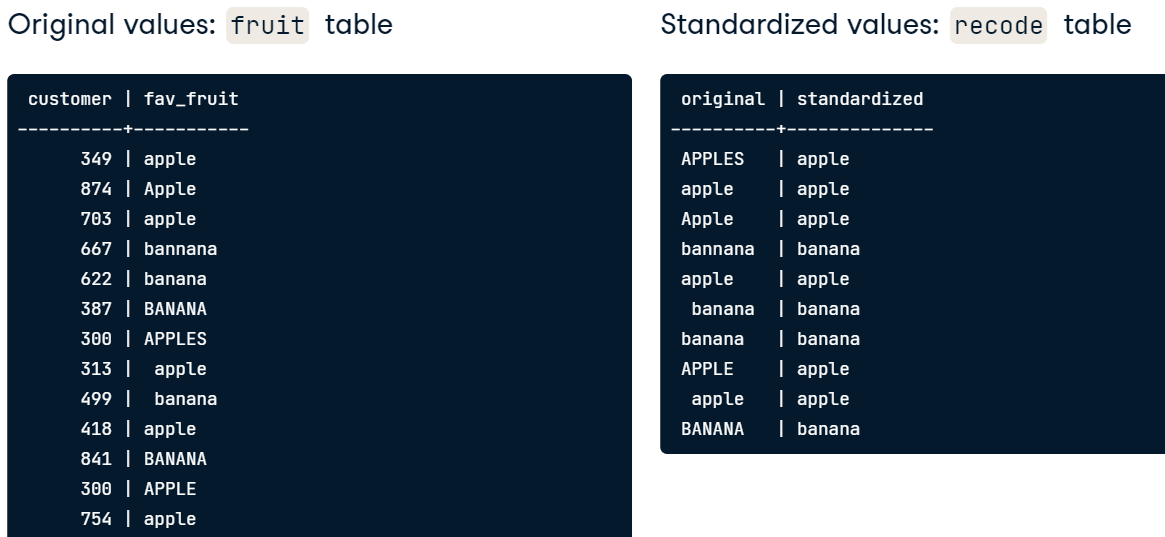


## Step 1: CREATE TEMP TABLE

```
CREATE TEMP TABLE recode AS SELECT DISTINCT fav_fruit AS original, -- original, messy values
                                   fav_fruit AS standardized -- new standardized values
FROM fruit;
```

## Step 2: UPDATE values

```
UPDATE table_name
SET column_name = new_value
WHERE condition;
```

## Step 3: JOIN original and recode tables

### Create an "other" category
If we want to summarize Evanston 311 requests by zip code, it would be useful to group all of the low frequency zip codes together in an "other" category.

In [134]:
pd.read_sql_query('''
SELECT CASE WHEN zipcount < 254 THEN 'other' ELSE zip END AS zip_recoded,
       SUM(zipcount) AS zipsum
FROM (SELECT zip, COUNT(*) AS zipcount
      FROM evanston311
      GROUP BY zip) AS fullcounts
GROUP BY zip_recoded
ORDER BY zipsum DESC;''', engine)

,zip_recoded,zipsum
0,60201.0,19054
1,60202.0,11165
2,None,5528
3,other,429
4,60208.0,255


### Group and recode values

There are almost 150 distinct values of `evanston311.category`. But some of these categories are similar, with the form "Main Category - Details". We can get a better sense of what requests are common if we aggregate by the main category.

To do this, create a temporary table `recod`e mapping distinct `category` values to new, `standardized` values. Make the `standardized` values the part of the category before a dash (`'-'`). Extract this value with the `SPLIT_PART()` function:

```
split_part(string text, delimiter text, field int)
```

You'll also need to do some additional cleanup of a few cases that don't fit this pattern.

Then the `evanston311` table can be joined to `recode` to group requests by the new `standardized` category values.

1. Create `recode` with a `standardized` column; use `SPLIT_PART()` and then `RTRIM()` to remove any remaining whitespace on the result of `SPLIT_PART`().

```
-- Fill in the command below with the name of the temp table
DROP TABLE IF EXISTS recode;
CREATE TEMP TABLE recode AS SELECT DISTINCT category, 
                                   RTRIM(SPLIT_PART(category, '-', 1)) AS standardized
                                   FROM evanston311;
    
-- Look at a few values before the next step
SELECT DISTINCT standardized 
FROM recode
WHERE standardized LIKE 'Trash%Cart' OR standardized LIKE 'Snow%Removal%';
```
```
+-----------------------------------+
| standardized                      |
+-----------------------------------+
Snow Removal
Snow Removal/Concerns
Snow/Ice/Hazard Removal
Trash Cart
Trash Cart, Recycling Cart
Trash, Recycling, Yard Waste Cart
```

2. UPDATE `standardized` values `LIKE` `'Trash%Cart'` to `'Trash Cart'`.
    * UPDATE `standardized` values of `'Snow Removal/Concerns'` and `'Snow/Ice/Hazard Removal'` to `'Snow Removal'`.
   
   
```   
DROP TABLE IF EXISTS recode;
CREATE TEMP TABLE recode AS SELECT DISTINCT category, 
                                   RTRIM(SPLIT_PART(category, '-', 1)) AS standardized
                                   FROM evanston311;

UPDATE recode 
SET standardized='Trash Cart' 
WHERE standardized LIKE 'Trash%Cart';

UPDATE recode
SET standardized='Snow Removal' 
WHERE standardized LIKE  'Snow Removal/Concerns'  OR category LIKE 'Snow/Ice/Hazard Removal' ;
    

SELECT DISTINCT standardized 
FROM recode
WHERE standardized LIKE 'Trash%Cart'
OR standardized LIKE 'Snow%Removal%';
```   

```   

+--------------+
|standardized  |
+--------------+
|Snow Removal  |
|Trash Cart    |
+--------------+
```   

3. `UPDATE` `recode` by setting `standardized` values of 'THIS REQUEST IS INACTIVE...Trash Cart', '(DO NOT USE) Water Bill', 'DO NOT USE Trash', and 'NO LONGER IN USE' to `'UNUSED'`.

```
UPDATE recode
SET standardized='UNUSED' 
WHERE standardized IN ('THIS REQUEST IS INACTIVE...Trash Cart', 
                       '(DO NOT USE) Water Bill',
                       'DO NOT USE Trash', 
                       'NO LONGER IN USE');
```

4. Now, join the `evanston311` and `recode` tables to count the number of requests with each of the `standardized` values
    * List the most common `standardized` values first.

```
DROP TABLE IF EXISTS recode;
CREATE TEMP TABLE recode AS SELECT DISTINCT category, 
                                   RTRIM(SPLIT_PART(category, '-', 1)) AS standardized
                            FROM evanston311;
UPDATE recode SET standardized='Trash Cart' 
WHERE standardized LIKE 'Trash%Cart';

UPDATE recode SET standardized='Snow Removal' 
WHERE standardized LIKE 'Snow%Removal%';

UPDATE recode SET standardized='UNUSED' 
WHERE standardized IN ('THIS REQUEST IS INACTIVE...Trash Cart', 
               '(DO NOT USE) Water Bill',
               'DO NOT USE Trash', 'NO LONGER IN USE');


SELECT standardized, COUNT(*)
FROM recode 
LEFT JOIN evanston311 USING(category)
GROUP BY standardized
ORDER BY count DESC;
```

```
+-------------------------------+------+
|standardized	                | count|
+-------------------------------+------+
|Broken Parking Meter	        |  6092|
|Trash	                        |  3699|
|Ask A Question / Send A Message|  2595|
|Trash Cart	                    |  1902|
|Tree Evaluation	            |  1879|
|Rodents	                    |  1305|
|Recycling	                    |  1224|
|......................         |  ....|
```


### Create a table with indicator variables
Determine whether medium and high priority requests in the `evanston311` data are more likely to contain requesters' contact information: an email address or phone number.

* Emails contain an @.
* Phone numbers have the pattern of three characters, dash, three characters, dash, four characters. For example: 555-555-1212.

Use `LIKE` to match these patterns. Remember `%` matches any number of characters (even 0), and `_` matches a single character. Enclosing a pattern in `%` (i.e. before and after your pattern) allows you to locate it within other text.

For example, `'%___.com%'` would allow you to search for a reference to a website with the top-level domain `'.com'` and at least three characters preceding it.

Create and store indicator variables for email and phone in a temporary table. `LIKE` produces True or False as a result, but casting a boolean (True or False) as an `integer` converts True to 1 and False to 0. This makes the values easier to summarize later.

* Create a temp table `indicators` from `evanston311` with three columns: `id`, `email`, and `phone`.

* Use `LIKE` comparisons to detect the email and phone patterns that are in the `description`, and cast the result as an integer with `CAST()`.

    * Your phone indicator should use a combination of underscores `_` and dashes `-` to represent a standard 10-digit phone number format.
    * Remember to start and end your patterns with `%` so that you can locate the pattern within other text!
    
```
DROP TABLE IF EXISTS indicators;
CREATE TEMP TABLE indicators AS
SELECT id, 
       CAST(description LIKE '%@%' AS integer) AS email,
       CAST(description LIKE '%___-___-____%' AS integer) AS phone 
FROM evanston311;

SELECT *
FROM indicators;
```

In [136]:
pd.read_sql_query('''
WITH indicators AS (SELECT id, 
                           CAST(description LIKE '%@%' AS integer) AS email,
                           CAST(description LIKE '%___-___-____%' AS integer) AS phone 
                    FROM evanston311)

SELECT *
FROM indicators;''', engine).head(10)

,id,email,phone
0,1340563,0.0,0.0
1,1826017,0.0,0.0
2,1849204,0.0,0.0
3,1880254,0.0,0.0
4,1972582,0.0,1.0
5,1840025,0.0,0.0
6,2099219,0.0,0.0
7,2554820,NaN,NaN
8,1770749,0.0,0.0
9,2129641,0.0,1.0


* Join the `indicators` table to `evanston311`, selecting the proportion of reports including an `email` or `phone` grouped by `priority`.
* Include adjustments to account for issues arising from integer division.

```
DROP TABLE IF EXISTS indicators;
CREATE TEMP TABLE indicators AS
  SELECT id, 
         CAST (description LIKE '%@%' AS integer) AS email,
         CAST (description LIKE '%___-___-____%' AS integer) AS phone 
    FROM evanston311;
  
SELECT priority,
       SUM(email)/COUNT(*)::NUMERIC AS email_prop, 
       SUM(phone)/COUNT(*)::NUMERIC AS phone_prop
FROM evanston311
LEFT JOIN indicators ON evanston311.id = indicators.id
GROUP BY priority;
```

# วิธีแก้เรื่อง CAST กับ :: ใน sqlite ให้ผลลัพธ์ไม่ตรงกัย Postgre แก้ได้โดย คูณ 1.0 เข้าไปที่ตัวเศษหรือตัวส่วน

In [141]:
pd.read_sql_query('''
WITH indicators AS (SELECT id, 
                           CAST (description LIKE '%@%' AS integer) AS email,
                           CAST (description LIKE '%___-___-____%' AS integer) AS phone 
                    FROM evanston311)

SELECT priority,
       SUM(email)*1.0/COUNT(*) AS email_prop, 
       SUM(phone)*1.0/COUNT(*) AS phone_prop
FROM evanston311
LEFT JOIN indicators ON evanston311.id = indicators.id
GROUP BY priority;''', engine)

,priority,email_prop,phone_prop
0,HIGH,0.011364,0.022727
1,LOW,0.005803,0.001934
2,MEDIUM,0.019669,0.018451
3,NONE,0.004122,0.005685


# DATE, TIMESTAMP, INTERVAL, and TIMEZONE from UTC

## Current Timestamp

* `SELECT NOW()`

In sqlite, there is no `NOW()` so it must be implemented as below.

In [156]:
pd.read_sql_query('''
SELECT DATE('now'),
       TIME('now'),
       DATETIME('now'),
       DATE('now') > '2017-12-31',
       DATE('now') > '2022-12-31',
       JULIANDAY('now')-JULIANDAY('2018-01-01') ''', engine)

,DATE('now'),TIME('now'),DATETIME('now'),DATE('now') > '2017-12-31',DATE('now') > '2022-12-31',JULIANDAY('now')-JULIANDAY('2018-01-01')
0,2021-10-22,10:39:54,2021-10-22 10:39:54,1,0,1390.444379


## Date comparisons

When working with timestamps, sometimes you want to find all observations on a given day. However, if you specify only a date in a comparison, you may get unexpected results. This query:

```
SELECT count(*) 
FROM evanston311
WHERE date_created = '2018-01-02';
```
returns 0, even though there were 49 requests on January 2, 2018.

This is because dates are automatically converted to timestamps when compared to a timestamp. The time fields are all set to zero:

```
SELECT '2018-01-02'::timestamp;
```
```
2018-01-02 00:00:00
```

When working with both timestamps and dates, you'll need to keep this in mind.

1. Count the number of Evanston 311 requests created on `January 31, 2017` by casting date_created to a `date`.

```
SELECT COUNT(*) 
FROM evanston311
WHERE CAST(date_created AS date) = '2017-01-31';
```

ใน SQLite ใช้ CAST แบบนี้ไม่ได้ ไม่รู้เพราะอะไร

In [165]:
pd.read_sql_query('''
SELECT COUNT(*) AS count
FROM evanston311
WHERE CAST(date_created AS date) = '2017-01-31';''', engine)

,count
0,0


ต้องใช้ `DATE(ชื่อคอลัมน์)` แทน

In [163]:
pd.read_sql_query('''
SELECT COUNT(*) AS count
FROM evanston311
WHERE DATE(date_created) = '2017-01-31';''', engine)

,count
0,45


2. Count the number of Evanston 311 requests created on February 29, 2016 by using `>=` and `<` operators.

```
SELECT COUNT(*) AS count
FROM evanston311 
WHERE date_created >= '2016-02-29' AND date_created < '2016-03-01';
```

In [167]:
pd.read_sql_query('''
SELECT COUNT(*) AS count
FROM evanston311 
WHERE date_created >= '2016-02-29' AND date_created < '2016-03-01';''', engine)

,count
0,58


3. Count the number of requests created on March 13, 2017 and specify the upper bound by adding 1 to the lower bound.

```
SELECT COUNT(*) AS count
FROM evanston311
WHERE date_created >= '2017-03-13' AND date_created < '2017-03-13'::date + 1;
```

In SQLite, this is done differently.

In [168]:
pd.read_sql_query('''
SELECT COUNT(*) AS count
FROM evanston311
WHERE date_created >= '2017-03-13' AND date_created < DATE('2017-03-13', '+1 day');''', engine)

,count
0,33


### Date arithmetic
You can subtract dates or timestamps from each other.

You can add time to dates or timestamps using intervals. An interval is specified with a number of units and the name of a datetime field. For example:

* `'3 days'::interval`
* `'6 months'::interval`
* `'1 month 2 years'::interval`
* `'1 hour 30 minutes'::interval`

Practice date arithmetic with the Evanston 311 data and `NOW()`

1. Subtract the minimum `date_created` from the maximum `date_created`.

```
SELECT MAX(date_created) - MIN(date_created)
FROM evanston311;
```

In SQLite, you have no other choice than using `JULIANDAY()`, but you won't get hours.

In [175]:
pd.read_sql_query('''
SELECT  MAX(DATETIME(date_created)), MIN(DATETIME(date_created)), MAX(JULIANDAY(date_created)) - MIN(JULIANDAY(date_created))
FROM evanston311;''', engine)

,MAX(DATETIME(date_created)),MIN(DATETIME(date_created)),MAX(JULIANDAY(date_created)) - MIN(JULIANDAY(date_created))
0,2018-06-30 16:36:22,2016-01-01 00:02:43,911.690035


2. Using `NOW()`, find out how old the most recent `evanston311` request was created.

```
SELECT NOW() - MAX(date_created)
FROM evanston311;
```

In [178]:
pd.read_sql_query('''
SELECT DATETIME('now'), MAX(DATETIME(date_created)), JULIANDAY('now') - MAX(JULIANDAY(date_created))
FROM evanston311;''', engine)

,DATETIME('now'),MAX(DATETIME(date_created)),JULIANDAY('now') - MAX(JULIANDAY(date_created))
0,2021-10-22 11:15:03,2018-06-30 16:36:22,1209.77687


3. Add 100 days to the current timestamp.

```
SELECT NOW()+ '100 days'::INTERVAL;
```

This is done differently in SQLite

In [189]:
pd.read_sql_query('''
SELECT DATETIME('now'), DATETIME('now', '+100 days') ''', engine)

,DATETIME('now'),"DATETIME('now', '+100 days')"
0,2021-10-22 11:25:08,2022-01-30 11:25:08


4. Select the current timestamp and the current timestamp plus 5 minutes.

```
SELECT NOW() + '5 minutes'::INTERVAL;
```

In [188]:
pd.read_sql_query('''
SELECT DATETIME('now'), DATETIME('now', '+5 minutes')''', engine)

,DATETIME('now'),"DATETIME('now', '+5 minutes')"
0,2021-10-22 11:24:53,2021-10-22 11:29:53


### Completion time by category

The `evanston311` data includes a `date_created` timestamp from when each request was created and a `date_completed` timestamp for when it was completed. The difference between these tells us how long a request was open.

Which `category` of Evanston 311 requests takes the longest to complete?

* Compute the average difference between the completion timestamp and the creation timestamp by `category`.
* Order the results with the largest average time to complete the request first.

```
SELECT category, 
       AVG(date_completed-date_created) AS completion_time
FROM evanston311
GROUP BY category
ORDER BY completion_time DESC;
```

In [192]:
pd.read_sql_query('''
SELECT category, 
       AVG(JULIANDAY(date_completed)-JULIANDAY(date_created)) AS completion_time
FROM evanston311
GROUP BY category
ORDER BY completion_time DESC;''', engine)

,category,completion_time
0,Rodents- Rats,64.457211
1,Fire Prevention - Public Education,34.700116
2,Key Request - All City Employees,32.036238
3,Smoking,27.321183
4,Notice of Violation,24.236952
...,...,...
144,Child Seat Installation or Inspection,0.359148
145,Animal Service - Wilmette,0.340781
146,Lawn Irrigation Violation,0.293526
147,"Food Waste, Collective Resource- Ask a Question/Send a Message",0.148275


# EXTRACT() and DATE_PART()

```
DATE_PART('field', timestamp)
```

```
EXTRACT(field FROM timestamp)
```

```
SELECT DATE_PART('month', now()),
       EXTRACT(MONTH FROM now());
```

This is done in SQLite using `STRFTIME()`

In [195]:
pd.read_sql_query("SELECT DATE('now'), STRFTIME('%m', DATE('now'));", engine)

,DATE('now'),"STRFTIME('%m', DATE('now'))"
0,2021-10-22,10


# DATE_TRUNC() 

`DATE_TRUNC('field', timestamp)`

### Date parts

The `DATE_PART()` function is useful when you want to aggregate data by a unit of time across multiple larger units of time. For example, aggregating data by month across different years, or aggregating by hour across different days.

Recall that you use `DATE_PART()` as:

`SELECT DATE_PART()('field', timestamp);`

In this exercise, you'll use `DATE_PART()` to gain insights about when Evanston 311 requests are submitted and completed.

```
SELECT DATE_PART('month', date_created) AS month, 
       COUNT(*) AS count
FROM evanston311
WHERE date_created BETWEEN '2016-01-01'   AND  '2018-01-01'
GROUP BY month
ORDER BY month;
```

* How many requests are created in each of the 12 months during 2016-2017?

In [196]:
pd.read_sql_query('''
SELECT STRFTIME('%m', date_created) AS month, 
       COUNT(*) AS count
FROM evanston311
WHERE date_created BETWEEN '2016-01-01'   AND  '2018-01-01'
GROUP BY month
ORDER BY month;''', engine)

,month,count
0,01,1811
1,02,1774
2,03,2171
3,04,2385
4,05,2674
5,06,3404
6,07,3063
7,08,3109
8,09,2760
9,10,2398


* What is the most common hour of the day for requests to be created?

```
SELECT DATE_PART('hour', date_created) AS hour,
       COUNT(*) AS count
FROM evanston311
GROUP BY hour
ORDER BY count DESC
LIMIT 1;
```

In [197]:
pd.read_sql_query('''
SELECT STRFTIME('%H', date_created) AS hour,
       COUNT(*) AS count
FROM evanston311
GROUP BY hour
ORDER BY count DESC
LIMIT 1;''', engine)

,hour,count
0,09,4089


* During what hours are requests usually completed? Count requests completed by hour.
* Order the results by hour.

```
SELECT DATE_PART('hour', date_completed) AS hour,
       COUNT(*) AS count
FROM evanston311
GROUP BY hour
ORDER BY hour;
```

In [199]:
pd.read_sql_query('''
SELECT STRFTIME('%H', date_completed) AS hour,
       COUNT(*) AS count
FROM evanston311
GROUP BY hour
ORDER BY hour;''', engine)

,hour,count
0,00,13
1,01,10
2,02,11
3,03,19
4,04,9
5,05,50
6,06,1296
7,07,1870
8,08,2516
9,09,2744


### Variation by day of week
Does the time required to complete a request vary by the day of the week on which the request was created?

We can get the name of the day of the week by converting a timestamp to character data:

`TO_CHAR(date_created, 'day')`

But character names for the days of the week sort in alphabetical, not chronological, order. To get the chronological order of days of the week with an integer value for each day, we can use:

`EXTRACT(DOW FROM date_created)`

`DOW` stands for "day of week."

* Select the name of the day of the week the request was created (`date_created`) as `day`.
* Select the average time between the request completion (`date_completed`) and request creation as `duration`.
* Group by `day` (the name of the day of the week) and the integer value for the day of the week (use a function).
* Order by the integer value of the day of the week using the same function used in `GROUP BY`.

```
SELECT TO_CHAR(date_created, 'day') AS day, 
       AVG(date_completed - date_created) AS duration
FROM evanston311 
 -- Group by the name of the day of the week and 
 -- integer value of day of week the request was created
GROUP BY day, EXTRACT(DOW FROM date_created)
 -- Order by integer value of the day of the week 
 -- the request was created
ORDER BY EXTRACT(DOW FROM date_created);
```

SQLite doesn't have `TO_CHAR()` function.  To do the above, you probably need to write seven `CASE .. WHEN`

### Date truncation

Unlike `DATE_PART()` or `EXTRACT()`, `DATE_TRUNC()` keeps date/time units larger than the field you specify as part of the date. So instead of just extracting one component of a timestamp, `DATE_TRUNC()` returns the specified unit and all larger ones as well.

Recall the syntax:

`DATE_TRUNC('field', timestamp)`

Using `DATE_TRUNC()`, find the average number of Evanston 311 requests created per day for each month of the data. Ignore days with no requests when taking the average.

* Write a subquery to count the number of requests created per day.
* Select the month and average count per month from the `daily_count` subquery.

```
SELECT DATE_TRUNC('month', day) AS month,
       AVG(count)
FROM (SELECT DATE_TRUNC('day', date_created) AS day,
             COUNT(*) AS count
      FROM evanston311
      GROUP BY day) AS daily_count
GROUP BY month
ORDER BY month;
```

ข้อนี้ต้องใช้ `DATE_TRUNC` ทำ เพราะต้องการหน่วยของเวลาที่ใหญ่กว่าให้เหลือมาเลือกได้ทีหลัง

```
month	                           avg
2016-01-01 00:00:00+00:00	23.5161290322580645
2016-02-01 00:00:00+00:00	30.7241379310344828
2016-03-01 00:00:00+00:00	35.5483870967741935
..................             ...............
```

# GENERATE_SERIES() for time series

Syntax
* `SELECT GENERATE_SERIES(from, to, interval)`

Example
* `SELECT GENERATE_SERIES('2018-01-01', '2018-01-15', '2 days'::INTERVAL);`

```
---------------------
2018-01-01 00:00:00
2018-01-03 00:00:00
2018-01-05 00:00:00
2018-01-07 00:00:00
2018-01-09 00:00:00
2018-01-11 00:00:00
2018-01-13 00:00:00
2018-01-15 00:00:00
```


* `SELECT GENERATE_SERIES('2018-01-01', '2018-01-02', '5 hours'::INTERVAL);`


```
generate_series
----------------------
2018-01-01 00:00:00
2018-01-01 05:00:00
2018-01-01 10:00:00
2018-01-01 15:00:00
2018-01-01 20:00:00
```


## Generate series using the end of the month

* `SELECT GENERATE_SERIES('2018-02-01',  '2019-01-01', '1 month'::INTERVAL) - '1 day'::INTERVAL;`

```
generate_series
---------------------
2018-01-31 00:00:00
2018-02-28 00:00:00
2018-03-31 00:00:00
2018-04-30 00:00:00
2018-05-31 00:00:00
2018-06-30 00:00:00
2018-07-31 00:00:00
2018-08-31 00:00:00
2018-09-30 00:00:00
2018-10-31 00:00:00
2018-11-30 00:00:00
2018-12-31 00:00:00
```
### Find missing dates
The `GENERATE_SERIES()` function can be useful for identifying missing dates.

Recall:

`GENERATE_SERIES(from, to, interval)`

where `from` and `to` are dates or timestamps, and `interval` can be specified as a string with a number and a unit of time, such as `'1 month'`.

Are there any days in the Evanston 311 data where no requests were created?

1. Write a subquery using `GENERATE_SERIES()` to get all dates between the `MIN(date_created)` and `MAX(date_created)`  in `evanston311`.
2. Write another subquery to select all values of `date_created` as dates from `evanston311`.
3. Both subqueries should produce values of type `date` (look for the `::`).
4. Select dates (`day`) from the first subquery that are `NOT IN` the results of the second subquery. This gives you days that are not in `date_created`.

```
SELECT day
FROM (SELECT GENERATE_SERIES(MIN(date_created), MAX(date_created), '1 day'::INTERVAL)::DATE AS day
      FROM evanston311) AS all_dates
WHERE day NOT IN (SELECT date_created::DATE
                  FROM evanston311);
```

### Custom aggregation periods

Find the median number of Evanston 311 requests per day in each six month period from `2016-01-01` to `2018-06-30`. Build the query following the three steps below.

Recall that to aggregate data by non-standard date/time intervals, such as six months, you can use `GENERATE_SERIES()` to create bins with lower and upper bounds of time, and then summarize observations that fall in each bin.

* Use `GENERATE_SERIES()` to create bins of 6 month intervals. Recall that the **upper bin values are exclusive**, so the values need to be one day greater than the last day to be included in the bin.

    * Notice how in the sample code, the **first** bin value of the upper bound is July 1st, and ***not*** June 30th.
    * Use the same approach when creating the **last bin** values of the lower and upper bounds (i.e. for 2018).
    
```
SELECT GENERATE_SERIES('2016-01-01', '2018-01-02', '6 months'::interval) AS lower,
       GENERATE_SERIES('2016-07-01', '2018-07-02','6 months'::interval) AS upper;
```

```
lower	                                  upper
2016-01-01 00:00:00+00:00	2016-07-01 00:00:00+00:00
2016-07-01 00:00:00+00:00	2017-01-01 00:00:00+00:00
2017-01-01 00:00:00+00:00	2017-07-01 00:00:00+00:00
..................................................
```

* Count the number of requests created per day. Remember to not count `*`, or you will risk counting `NULL` values.

* Include days with no requests by joining `evanston311` to a **daily** series from `2016-01-01` to `2018-06-30`.

- *Note that because we are not generating bins, you can use June 30th as your series end date.*

```
SELECT day, COUNT(date_created) AS count
FROM (SELECT GENERATE_SERIES('2016-01-01', '2018-06-30', '1 day'::interval)::DATE AS day) AS daily_series
LEFT JOIN evanston311
ON day = date_created::DATE
GROUP BY day;
```

```
day	       count
2016-01-01	5
2016-01-02	27
2016-01-03	8
2016-01-04	55
2016-01-05	33
.................
```

* Assign each daily count to a single 6 month bin by joining `bins` to `daily_counts`.
* Compute the median value per bin using `PERCENTILE_DISC()`.

```
-- Bins from Step 1
WITH bins AS (
	 SELECT GENERATE_SERIES('2016-01-01', '2018-01-01', '6 months'::interval) AS lower,
             GENERATE_SERIES('2016-07-01', '2018-07-01', '6 months'::interval) AS upper),
-- Daily counts from Step 2
     daily_counts AS (
     SELECT day, count(date_created) AS count
     FROM (SELECT generate_series('2016-01-01', '2018-06-30','1 day'::interval)::DATE AS day) AS daily_series
     LEFT JOIN evanston311 ON day = date_created::DATE
     GROUP BY day)
-- Select bin bounds 
SELECT lower, 
       upper, 
       PERCENTILE_DISC(0.5) WITHIN GROUP (ORDER BY count) AS median
  -- Join bins and daily_counts
FROM bins LEFT JOIN daily_counts ON day >= lower AND day < upper
GROUP BY lower, upper
ORDER BY lower;
```

```
lower	                               upper	       median
2016-01-01 00:00:00+00:00	2016-07-01 00:00:00+00:00	37
2016-07-01 00:00:00+00:00	2017-01-01 00:00:00+00:00	41
2017-01-01 00:00:00+00:00	2017-07-01 00:00:00+00:00	44
2017-07-01 00:00:00+00:00	2018-01-01 00:00:00+00:00	51
......................          ...........................
```

### Monthly average with missing dates
Find the average number of Evanston 311 requests created per day for each month of the data.

This time, do not ignore dates with no requests.

* Generate a series of dates from `2016-01-01` to `2018-06-30`.
* Join the series to a subquery to count the number of requests created per day.
* Use `DATE_TRUNC()` to get months from `date`, which has all dates, NOT `day`.
* Use `COALESCE()` to replace NULL `count` values with 0. Compute the average of this value.

```
WITH all_days AS (SELECT GENERATE_SERIES('2016-01-01', '2018-06-30', '1 day'::interval) AS date),
  daily_count AS (SELECT date_trunc('day', date_created) AS day, COUNT(*) AS count
                  FROM evanston311
                  GROUP BY day)

SELECT DATE_TRUNC('month', date) AS month,
       -- Use coalesce to replace NULL count values with 0
       AVG(COALESCE(count, 0)) AS average
FROM all_days
LEFT JOIN daily_count ON all_days.date=daily_count.day
GROUP BY month
ORDER BY month; 
```

```
month	                          average
2016-01-01 00:00:00+00:00	23.5161290322580645
2016-02-01 00:00:00+00:00	30.7241379310344828
2016-03-01 00:00:00+00:00	35.5483870967741935
2016-04-01 00:00:00+00:00	37.3000000000000000
2016-05-01 00:00:00+00:00	39.4516129032258065
......................       ...............
```

# Time between events: LEAD and LAG

### Longest gap
What is the longest time between Evanston 311 requests being submitted?

Recall the syntax for `LEAD()` and `LAG()`:

* `LAG(column_to_adjust) OVER (ORDER BY ordering_column)`
* `LEAD(column_to_adjust) OVER (ORDER BY ordering_column)`

-------------

* Select `date_created` and the `date_created` of the previous request using LEAD() or LAG() as appropriate.
* Compute the gap between each request and the previous request.
* Select the row with the maximum gap

```
WITH request_gaps AS (SELECT date_created,
                             LAG(date_created) OVER (ORDER BY date_created) AS previous,
                             date_created - LAG(date_created) OVER (ORDER BY date_created) AS gap
                      FROM evanston311)

SELECT *
FROM request_gaps
WHERE gap = (SELECT MAX(gap) FROM request_gaps);
```

IN SQLite, the function `JULIANDAY()` must be used to compute the duration between time.

In [203]:
pd.read_sql_query('''
WITH request_gaps AS (SELECT date_created,
                             LAG(date_created) OVER (ORDER BY date_created) AS previous,
                             JULIANDAY(date_created) - JULIANDAY(LAG(date_created) OVER (ORDER BY date_created)) AS gap
                      FROM evanston311)

SELECT *
FROM request_gaps
WHERE gap = (SELECT MAX(gap) FROM request_gaps);''', engine)

,date_created,previous,gap
0,2018-01-07T18:41:34Z,2018-01-05T18:04:09Z,2.025984


### Rats!
Requests in category "Rodents- Rats" average over 64 days to resolve. Why?

Investigate in 4 steps:

1. Why is the average so high? Check the distribution of completion times. Hint: `DATE_TRUNC()` can be used on intervals.

2. See how excluding outliers influences average completion times.

3. Do requests made in busy months take longer to complete? Check the correlation between the average completion time and requests per month.

4. Compare the number of requests created per month to the number completed.

**Remember**: the time to resolve, or completion time, is `date_completed - date_created`.

* Use `DATE_TRUNC()` to examine the distribution of rat request completion times by number of days.

```
SELECT DATE_TRUNC('day', date_completed - date_created) AS completion_time,
       COUNT(*)
FROM evanston311
WHERE category = 'Rodents- Rats'
GROUP BY completion_time
ORDER BY completion_time;
```

In [210]:
pd.read_sql_query('''
SELECT CAST(JULIANDAY(date_completed) - JULIANDAY(date_created) AS INTEGER) AS completion_time_in_days,
       COUNT(*) AS count
FROM evanston311
WHERE category = 'Rodents- Rats'
GROUP BY completion_time_in_days
ORDER BY completion_time_in_days;''', engine).head(10)

,completion_time_in_days,count
0,0,73
1,1,17
2,2,23
3,3,11
4,4,6
5,5,6
6,6,5
7,7,7
8,8,6
9,9,10


* Compute average completion time per category excluding the longest 5% of requests (outliers).

```
SELECT category, 
       AVG(date_completed-date_created) AS avg_completion_time
FROM evanston311
WHERE date_completed-date_created < 
-- Compute the 95th percentile of completion time in a subquery
         (SELECT percentile_disc(0.95) WITHIN GROUP (ORDER BY date_completed-date_created)
          FROM evanston311)
GROUP BY category
ORDER BY avg_completion_time DESC;
```

```
category	                                              avg_completion_time
Trash Cart - Downsize, Upsize or Remove	                12 days, 17:47:50.586912
Sanitation Billing Questions	                        12 days, 11:13:25.888889
THIS REQUEST IS INACTIVE...Trash Cart - Compost Bin	    12 days, 6:32:42.024390
Trash, Recycling, Yard Waste Cart- Repair/Replacement	11 days, 18:48:27.488108
Rodents- Rats	                                        11 days, 8:58:00.840849
Landmark Building Plaque or Nomination	                11 days, 5:11:11.666667
                .......................                     ..............
```

* Get `CORR()` between avg. completion time and monthly requests. `EXTRACT(epoch FROM interval)` returns seconds in `interval`.

-- Compute correlation (corr) between avg_completion time and count from the subquery

```
SELECT CORR(avg_completion, count)
  -- Convert date_created to its month with DATE_TRUNC
FROM (SELECT DATE_TRUNC('month', date_created) AS month, 
               -- Compute average completion time in number of seconds           
               AVG(EXTRACT(epoch FROM date_completed - date_created)) AS avg_completion, 
               -- Count requests per month
               COUNT(*) AS count
      FROM evanston311
      WHERE category='Rodents- Rats' 
      GROUP BY month) AS monthly_avgs;
```


* Select the number of requests created and number of requests completed per month.


```
-- Compute monthly counts of requests created
WITH created AS (
       SELECT DATE_TRUNC('month', date_created) AS month,
              COUNT(*) AS created_count
       FROM evanston311
       WHERE category='Rodents- Rats'
       GROUP BY month),
-- Compute monthly counts of requests completed
      completed AS (
       SELECT DATE_TRUNC('month', date_completed) AS month,
              COUNT(*) AS completed_count
       FROM evanston311
       WHERE category='Rodents- Rats'
       GROUP BY month)
-- Join monthly created and completed counts
SELECT created.month, 
       created_count, 
       completed_count
FROM created
INNER JOIN completed USING(month)
ORDER BY created.month;
```

```
month	                   created_count	completed_count
2016-01-01 00:00:00+00:00	11	                  1
2016-02-01 00:00:00+00:00	21	                 11
2016-03-01 00:00:00+00:00	31	                 14
2016-04-01 00:00:00+00:00	36	                 16
2016-05-01 00:00:00+00:00	40	                 19
......................................................
```